In [26]:
"""
    Luke Abbatessa, Jenny Cai, Jocelyn Ju, Varun Mcintyre
    DS4200
    Project
    Spring 2023
    pm-02 - Data Abstraction.ipynb
"""

'\n    Luke Abbatessa, Jenny Cai, Jocelyn Ju, Varun Mcintyre\n    DS4200\n    Project\n    Spring 2023\n    pm-02 - Data Abstraction.ipynb\n'

Consulted the original dataset throughout the process of data abstraction
https://www.kaggle.com/datasets/diegosilvadefrana/brazilian-deforestation-from-2000-to-2021?resource=download&select=data.csv

In [117]:
# Import the necessary libraries/packages
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random
import numpy as np

In [28]:
# Instantiate the necessary constants
FILENAME = "data.csv"

In [29]:
# Create the necessary helper functions


def read_file(filename, header=True):
    """Read in a .csv file as a Pandas dataframe"""
    if header:
        df = pd.read_csv(filename)
    else:
        df = pd.read_csv(filename, header=None)
    return df


def gauge_missing_vals(df):
    """Observe the counts of missing values both by column and by row"""
    col_missing_vals = df.isnull().sum()
    row_missing_vals = df.isnull().sum(axis = 1).sort_values(ascending = False)
    return col_missing_vals, row_missing_vals

# Read in the data

In [30]:
rf_df = read_file(FILENAME)
print(rf_df.head(10))

    ano  id_municipio   area  desmatado  incremento  floresta  nuvem  \
0  2000       1100015   7137     1761.1         NaN    3639.6    0.0   
1  2000       1100023   4481     2661.2         NaN    1730.0    0.0   
2  2000       1100031   1322      851.2         NaN     455.2    0.0   
3  2000       1100049   3821     2311.3         NaN    1477.7    0.0   
4  2000       1100056   2805      731.3         NaN     829.3    0.0   
5  2000       1100064   1460     1144.4         NaN     261.7    0.0   
6  2000       1100072   3081     1994.3         NaN     987.3    0.0   
7  2000       1100080   5058      687.0         NaN    3741.1    0.0   
8  2000       1100098   4551     1808.3         NaN    2445.9    0.0   
9  2000       1100106  25260     1152.5         NaN   20070.3    0.0   

   nao_observado  nao_floresta  hidrografia  
0            6.1        1708.0         22.2  
1            0.0          89.6          0.2  
2            0.6          11.3          3.7  
3            0.0       

In [31]:
print(rf_df.shape)

(16720, 10)


# Modify column names

In [32]:
rf_df = rf_df.rename(columns={rf_df.columns[0]: "Year", 
                              rf_df.columns[1]: "County_ID",
                              rf_df.columns[2]: "Total_Area",
                              rf_df.columns[3]: "Area_Deforested",
                              rf_df.columns[4]: "Incremented_Deforested_Area",
                              rf_df.columns[5]: "Forest_Area",
                              rf_df.columns[6]: "Area_Covered_by_Clouds",
                              rf_df.columns[7]: "Non_Observed_Area",
                              rf_df.columns[8]: "Non_Forest_Area",
                              rf_df.columns[9]: "Hydrography_Area"})

print(rf_df.head(10))

   Year  County_ID  Total_Area  Area_Deforested  Incremented_Deforested_Area  \
0  2000    1100015        7137           1761.1                          NaN   
1  2000    1100023        4481           2661.2                          NaN   
2  2000    1100031        1322            851.2                          NaN   
3  2000    1100049        3821           2311.3                          NaN   
4  2000    1100056        2805            731.3                          NaN   
5  2000    1100064        1460           1144.4                          NaN   
6  2000    1100072        3081           1994.3                          NaN   
7  2000    1100080        5058            687.0                          NaN   
8  2000    1100098        4551           1808.3                          NaN   
9  2000    1100106       25260           1152.5                          NaN   

   Forest_Area  Area_Covered_by_Clouds  Non_Observed_Area  Non_Forest_Area  \
0       3639.6                     0.0   

# Missing values

In [33]:
rf_col_missing_vals, \
rf_row_missing_vals = gauge_missing_vals(rf_df)

print(rf_col_missing_vals)

Year                             0
County_ID                        0
Total_Area                       0
Area_Deforested                  0
Incremented_Deforested_Area    760
Forest_Area                      0
Area_Covered_by_Clouds           0
Non_Observed_Area                0
Non_Forest_Area                  0
Hydrography_Area                 0
dtype: int64


It appears that the "Incremented Deforested Area" attribute is the only one in the dataset that contains missing values, and since it doesn't contribute to the "Total Area" attribute, the column will be dropped altogether.

In [34]:
rf_df.drop(["Incremented_Deforested_Area"], inplace=True, axis=1)
print(rf_df.head(10))

   Year  County_ID  Total_Area  Area_Deforested  Forest_Area  \
0  2000    1100015        7137           1761.1       3639.6   
1  2000    1100023        4481           2661.2       1730.0   
2  2000    1100031        1322            851.2        455.2   
3  2000    1100049        3821           2311.3       1477.7   
4  2000    1100056        2805            731.3        829.3   
5  2000    1100064        1460           1144.4        261.7   
6  2000    1100072        3081           1994.3        987.3   
7  2000    1100080        5058            687.0       3741.1   
8  2000    1100098        4551           1808.3       2445.9   
9  2000    1100106       25260           1152.5      20070.3   

   Area_Covered_by_Clouds  Non_Observed_Area  Non_Forest_Area  \
0                     0.0                6.1           1708.0   
1                     0.0                0.0             89.6   
2                     0.0                0.6             11.3   
3                     0.0          

# Unexpected values

In [35]:
print(rf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16720 entries, 0 to 16719
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    16720 non-null  int64  
 1   County_ID               16720 non-null  int64  
 2   Total_Area              16720 non-null  int64  
 3   Area_Deforested         16720 non-null  float64
 4   Forest_Area             16720 non-null  float64
 5   Area_Covered_by_Clouds  16720 non-null  float64
 6   Non_Observed_Area       16720 non-null  float64
 7   Non_Forest_Area         16720 non-null  float64
 8   Hydrography_Area        16720 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.1 MB
None


In [36]:
for col in rf_df.columns:
    print(rf_df[col].value_counts(dropna=False))

2000    760
2004    760
2019    760
2018    760
2021    760
2017    760
2015    760
2016    760
2014    760
2012    760
2013    760
2006    760
2011    760
2010    760
2003    760
2008    760
2009    760
2007    760
2001    760
2002    760
2005    760
2020    760
Name: Year, dtype: int64
1100015    22
2104602    22
2104073    22
2104081    22
2104099    22
           ..
1506302    22
1506351    22
1506401    22
1506500    22
5108956    22
Name: County_ID, Length: 760, dtype: int64
793     66
1045    44
598     44
397     44
3793    44
        ..
8286    22
7025    22
219     22
1048    22
5277    22
Name: Total_Area, Length: 724, dtype: int64
0.0       2190
0.6         31
0.1         27
542.5       25
249.0       24
          ... 
1153.9       1
174.4        1
956.6        1
760.0        1
2491.2       1
Name: Area_Deforested, Length: 9435, dtype: int64
0.0       2786
0.1         64
0.2         55
0.3         34
12.5        33
          ... 
1973.9       1
251.6        1
2411.6       1

Not only does it appear that each attribute is comprised of the correct data types, but it's also the case that no attribute appears to have any unexpected or invalid values. Thus, no data cleaning steps are required in this regard.

# Outliers

In [37]:
for col in rf_df.columns:
    print(rf_df[col].describe())
    print(" ")

count    16720.000000
mean      2010.500000
std          6.344479
min       2000.000000
25%       2005.000000
50%       2010.500000
75%       2016.000000
max       2021.000000
Name: Year, dtype: float64
 
count    1.672000e+04
mean     2.292061e+06
std      1.375414e+06
min      1.100015e+06
25%      1.502744e+06
50%      1.712430e+06
75%      2.109214e+06
max      5.108956e+06
Name: County_ID, dtype: float64
 
count     16720.000000
mean       6668.484211
std       13857.511878
min          64.000000
25%         891.750000
50%        2379.500000
75%        6422.000000
max      159540.000000
Name: Total_Area, dtype: float64
 
count    16720.000000
mean       954.653834
std       1374.296395
min          0.000000
25%        120.300000
50%        450.400000
75%       1258.325000
max      20471.500000
Name: Area_Deforested, dtype: float64
 
count     16720.000000
mean       3980.076304
std       11954.043960
min           0.000000
25%          19.000000
50%         222.650000
75%        2

Looking at the summary statistics for each attribute, it appears that the minimum Non-Observed Area is -379.6; since it doesn't make sense for there to be a negative area of land, negative values will be filtered out of this attribute.

Besides that, although it can be observed that there are large discrepancies in values for some of the attributes, it should be kept in mind that counties/municipalities are sized differently based on natural and/or political boundaries, so it isn't exactly fair to conclude that outliers exist in attributes relating to area. 

In [38]:
rf_df = rf_df[rf_df["Non_Observed_Area"] >= 0]
print(rf_df["Non_Observed_Area"].describe())

count    16716.000000
mean        95.863388
std        562.853251
min          0.000000
25%          0.000000
50%          0.000000
75%          1.200000
max      11321.100000
Name: Non_Observed_Area, dtype: float64


# Attributes to potentially visualize

In [39]:
rf_df["Proportion_Area_Deforested"] = rf_df["Area_Deforested"] / rf_df["Total_Area"]
rf_df["Proportion_Forest_Area"] = rf_df["Forest_Area"] / rf_df["Total_Area"]
rf_df["Proportion_Area_Covered_by_Clouds"] = rf_df["Area_Covered_by_Clouds"] / rf_df["Total_Area"]
rf_df["Proportion_Non_Observed_Area"] = rf_df["Non_Observed_Area"] / rf_df["Total_Area"]
rf_df["Proportion_Non_Forest_Area"] = rf_df["Non_Forest_Area"] / rf_df["Total_Area"]
rf_df["Proportion_Hydrography_Area"] = rf_df["Hydrography_Area"] / rf_df["Total_Area"]

print(rf_df.head(10))

   Year  County_ID  Total_Area  Area_Deforested  Forest_Area  \
0  2000    1100015        7137           1761.1       3639.6   
1  2000    1100023        4481           2661.2       1730.0   
2  2000    1100031        1322            851.2        455.2   
3  2000    1100049        3821           2311.3       1477.7   
4  2000    1100056        2805            731.3        829.3   
5  2000    1100064        1460           1144.4        261.7   
6  2000    1100072        3081           1994.3        987.3   
7  2000    1100080        5058            687.0       3741.1   
8  2000    1100098        4551           1808.3       2445.9   
9  2000    1100106       25260           1152.5      20070.3   

   Area_Covered_by_Clouds  Non_Observed_Area  Non_Forest_Area  \
0                     0.0                6.1           1708.0   
1                     0.0                0.0             89.6   
2                     0.0                0.6             11.3   
3                     0.0          

# Inconsistent/messy data

In [40]:
print("Dimensions of the df before duplicates are dropped:", rf_df.shape)
print(" ")
rf_df.drop_duplicates(inplace=True)
print("Dimensions of the df after duplicates are dropped:", rf_df.shape)

Dimensions of the df before duplicates are dropped: (16716, 15)
 
Dimensions of the df after duplicates are dropped: (16716, 15)


Since the attributes included in the dataset only consist of numeric instances, the data is consistent by nature.

Also, after further investigation, no duplicate rows were present in the dataframe.

Thus, there was no inconsistent or messy data, and no data cleaning is required in this regard.

# Biases

Tying back to what was said before, since the counties/municipalities are based on natural and/or political boundaries, there is inherent bias when it comes to the size of a certain area of land. 

It will evidently be the case that the larger a county/municipality is, the larger a certain area of land is. As a result, we will use the proportions of certain areas of land to take into account the discrepancies in the sizes of counties/municipalities.

# Additional Data Cleaning/Processing

Consulted GeeksforGeeks for randomly selecting rows from a Pandas DataFrame
https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/

In [105]:
# Group the df by Year
grouped = rf_df.groupby("Year")

for name, group in grouped:
    print(name)
    print(group)

2000
     Year  County_ID  Total_Area  Area_Deforested  Forest_Area  \
0    2000    1100015        7137           1761.1       3639.6   
1    2000    1100023        4481           2661.2       1730.0   
2    2000    1100031        1322            851.2        455.2   
3    2000    1100049        3821           2311.3       1477.7   
4    2000    1100056        2805            731.3        829.3   
..    ...        ...         ...              ...          ...   
755  2000    5108600        7443           3039.4       4206.9   
756  2000    5108808        1087            854.7        231.7   
757  2000    5108857        1942            759.5        618.5   
758  2000    5108907       11528           1677.7       9155.7   
759  2000    5108956        5277           1602.7       3654.7   

     Area_Covered_by_Clouds  Non_Observed_Area  Non_Forest_Area  \
0                       0.0                6.1           1708.0   
1                       0.0                0.0             89.6   
2

In [106]:
# Select a random sample of row indices from each of the 22 dfs
sample_dfs = []

for name, group in grouped:
    row_indices = group.index
    
    random.seed(42)
    
    random_indices = random.sample(list(row_indices), 90)
    
    sample_df = group.loc[random_indices]
    sample_dfs.append(sample_df)

In [107]:
# Concatenate each of the 22 sampled dfs
sample_df = pd.concat(sample_dfs)
print(sample_df)

       Year  County_ID  Total_Area  Area_Deforested  Forest_Area  \
654    2000    5103361        2707            548.2        840.4   
114    2000    1302900       40090           1129.0      36791.6   
25     2000    1100379        3994            915.9       2142.7   
281    2000    1507961         209            126.6          0.0   
250    2000    1506138        3830           2511.4        613.5   
...     ...        ...         ...              ...          ...   
14226  2021    2107001        1499            186.2         54.8   
14435  2021    5108600        7443           4686.5       2559.5   
13847  2021    1501253        2964           2204.2        697.3   
14153  2021    2101970         407            338.7         53.8   
14068  2021    1713809         751             59.4         21.3   

       Area_Covered_by_Clouds  Non_Observed_Area  Non_Forest_Area  \
654                       0.0                2.1           1316.3   
114                       0.0                

In [108]:
# Confirm all 22 years are represented in the subset
print(sample_df["Year"].value_counts(dropna=False))

2000    90
2001    90
2020    90
2019    90
2018    90
2017    90
2016    90
2015    90
2014    90
2013    90
2012    90
2011    90
2010    90
2009    90
2008    90
2007    90
2006    90
2005    90
2004    90
2003    90
2002    90
2021    90
Name: Year, dtype: int64


In [109]:
# Confirm there is at least one county represented over all 22 years
print(Counter(list(sample_df["County_ID"])))

Counter({5103361: 22, 1302900: 22, 1100379: 22, 1507961: 22, 1506138: 22, 1505007: 22, 1400233: 22, 1302009: 22, 1300904: 22, 1720200: 22, 1100908: 22, 1100700: 22, 1301407: 22, 1504703: 22, 1505502: 22, 1100452: 22, 1503200: 22, 5107040: 22, 5108204: 22, 1720002: 22, 1504901: 22, 2100873: 22, 1508035: 22, 1100072: 22, 1500958: 22, 5108006: 22, 1705557: 22, 1500701: 22, 1504455: 22, 1704105: 22, 5108352: 22, 1301308: 22, 1713957: 22, 1301704: 22, 1709500: 22, 1706258: 22, 1507409: 22, 1101484: 22, 2101806: 22, 1303957: 22, 1713700: 22, 1300300: 22, 1600253: 22, 1710706: 22, 1502939: 22, 1200609: 22, 1101500: 22, 1505304: 22, 1600154: 22, 1300409: 22, 5107883: 22, 1301951: 22, 5107180: 22, 2101251: 22, 1711506: 22, 1501204: 22, 1712405: 22, 1708254: 22, 1504059: 22, 1507474: 22, 1200807: 22, 1501725: 22, 5108600: 22, 1501253: 22, 2101970: 22, 1713809: 22, 5106182: 21, 2108306: 21, 2111763: 21, 2105153: 21, 2112902: 21, 2109551: 21, 5107701: 21, 5103957: 21, 2111722: 21, 5106802: 21, 510

In [110]:
# Filter the dataframe for the counties that appear in all years
counties_of_focus = []

for county_id in sorted(list(set(sample_df["County_ID"]))):
    if sample_df["County_ID"].value_counts()[county_id] == 22:
        counties_of_focus.append(county_id)

sample_df_filtered = sample_df[sample_df["County_ID"].isin(counties_of_focus)]
print(Counter(list(sample_df_filtered["County_ID"])))

Counter({5103361: 22, 1302900: 22, 1100379: 22, 1507961: 22, 1506138: 22, 1505007: 22, 1400233: 22, 1302009: 22, 1300904: 22, 1720200: 22, 1100908: 22, 1100700: 22, 1301407: 22, 1504703: 22, 1505502: 22, 1100452: 22, 1503200: 22, 5107040: 22, 5108204: 22, 1720002: 22, 1504901: 22, 2100873: 22, 1508035: 22, 1100072: 22, 1500958: 22, 5108006: 22, 1705557: 22, 1500701: 22, 1504455: 22, 1704105: 22, 5108352: 22, 1301308: 22, 1713957: 22, 1301704: 22, 1709500: 22, 1706258: 22, 1507409: 22, 1101484: 22, 2101806: 22, 1303957: 22, 1713700: 22, 1300300: 22, 1600253: 22, 1710706: 22, 1502939: 22, 1200609: 22, 1101500: 22, 1505304: 22, 1600154: 22, 1300409: 22, 5107883: 22, 1301951: 22, 5107180: 22, 2101251: 22, 1711506: 22, 1501204: 22, 1712405: 22, 1708254: 22, 1504059: 22, 1507474: 22, 1200807: 22, 1501725: 22, 5108600: 22, 1501253: 22, 2101970: 22, 1713809: 22})


Consulted datagy for using Pandas aggregate for multiple columns
https://datagy.io/pandas-groupby-multiple-columns/

In [111]:
# Group the Proportion Area Deforested by Year
areas_by_year = sample_df_filtered.groupby(["Year"]).aggregate({"Total_Area": "sum", "Area_Deforested": "sum"}).reset_index()

areas_by_year["Proportion_Area_Deforested"] = areas_by_year["Area_Deforested"] / areas_by_year["Total_Area"]
print(areas_by_year)

    Year  Total_Area  Area_Deforested  Proportion_Area_Deforested
0   2000      619924          47620.5                    0.076817
1   2001      619924          51166.7                    0.082537
2   2002      619924          53287.8                    0.085959
3   2003      619924          56873.6                    0.091743
4   2004      619924          58988.1                    0.095154
5   2005      619924          61124.8                    0.098600
6   2006      619924          62024.6                    0.100052
7   2007      619924          63220.1                    0.101980
8   2008      619924          64107.3                    0.103412
9   2009      619924          64718.3                    0.104397
10  2010      619924          65363.1                    0.105437
11  2011      619924          65863.3                    0.106244
12  2012      619924          66248.1                    0.106865
13  2013      619924          66678.7                    0.107559
14  2014  

In [112]:
# Drop unnecessary columns
areas_by_year.drop(["Total_Area", "Area_Deforested"], inplace=True, axis=1)
print(areas_by_year)

    Year  Proportion_Area_Deforested
0   2000                    0.076817
1   2001                    0.082537
2   2002                    0.085959
3   2003                    0.091743
4   2004                    0.095154
5   2005                    0.098600
6   2006                    0.100052
7   2007                    0.101980
8   2008                    0.103412
9   2009                    0.104397
10  2010                    0.105437
11  2011                    0.106244
12  2012                    0.106865
13  2013                    0.107559
14  2014                    0.108173
15  2015                    0.108770
16  2016                    0.109437
17  2017                    0.110359
18  2018                    0.111158
19  2019                    0.112364
20  2020                    0.113508
21  2021                    0.115258


In [114]:
# Turn the df into a .csv file to be used in D3
areas_by_year.to_csv("def_data.csv", index=False)

In [113]:
# Create another column for incrementing proportions
proportion_sums = []

for idx, row in areas_by_year.iterrows():
    proportion_sum = sum(areas_by_year["Proportion_Area_Deforested"][0:idx+1])
    proportion_sums.append(proportion_sum)
print(proportion_sums)

[0.07681667430201121, 0.15935372723107993, 0.24531232860802293, 0.3370551874100696, 0.4322089481936495, 0.5308094218000916, 0.6308613636510282, 0.7328417677005569, 0.8362533149224745, 0.9406504668314182, 1.046087746239862, 1.152331898748879, 1.2591967725075979, 1.3667562475400212, 1.4749290235577266, 1.5836989695511063, 1.6931359327917617, 1.8034954284718774, 1.9146537317477628, 2.0270178279918185, 2.1405262580574393, 2.2557840961150077]


In [118]:
# Create even chunks of the areas_by_year df
df_chunks = np.array_split(areas_by_year, 7)

for chunk in df_chunks:
    print(chunk)

   Year  Proportion_Area_Deforested
0  2000                    0.076817
1  2001                    0.082537
2  2002                    0.085959
3  2003                    0.091743
   Year  Proportion_Area_Deforested
4  2004                    0.095154
5  2005                    0.098600
6  2006                    0.100052
   Year  Proportion_Area_Deforested
7  2007                    0.101980
8  2008                    0.103412
9  2009                    0.104397
    Year  Proportion_Area_Deforested
10  2010                    0.105437
11  2011                    0.106244
12  2012                    0.106865
    Year  Proportion_Area_Deforested
13  2013                    0.107559
14  2014                    0.108173
15  2015                    0.108770
    Year  Proportion_Area_Deforested
16  2016                    0.109437
17  2017                    0.110359
18  2018                    0.111158
    Year  Proportion_Area_Deforested
19  2019                    0.112364
20  2020      

In [142]:
# Create a df with year ranges and average proportions of area deforested per range
year_ranges = []
range_mins = []
range_maxs = []
midyears = []
avg_prop_area_def = []
year_diffs = []

for chunk in df_chunks[:1]:
    years = sorted(list(chunk["Year"]))
    year_ranges.append(str(years[0]) + "-" + str(years[-1]))
    range_mins.append(years[0])
    range_maxs.append(years[-1])
    
    midyears.append(((years[0] + years[-1]) / 2))
    
    props_area_def = list(chunk["Proportion_Area_Deforested"])
    avg_prop_area_def.append((sum(props_area_def) / len(props_area_def)))
    
    year_diffs.append(((years[-1] - years[0]) + 1))
    
for chunk in df_chunks[1:]:
    years = sorted(list(chunk["Year"]))
    year_ranges.append(str(years[0] - 1) + "-" + str(years[-1]))
    range_mins.append((years[0] - 1))
    range_maxs.append(years[-1])
    
    midyears.append((((years[0] - 1) + years[-1]) / 2))
    
    props_area_def = list(chunk["Proportion_Area_Deforested"])
    avg_prop_area_def.append((sum(props_area_def) / len(props_area_def)))
    
    year_diffs.append(((years[-1] - (years[0] - 1)) + 1))
    
avg_areas_by_year_range = pd.DataFrame()
avg_areas_by_year_range["Year_Range"] = year_ranges
avg_areas_by_year_range["Range_Minimums"] = range_mins
avg_areas_by_year_range["Range_Maximums"] = range_maxs
avg_areas_by_year_range["Midyear"] = midyears
avg_areas_by_year_range["Average_Proportion_Area_Deforested"] = avg_prop_area_def
print(avg_areas_by_year_range)

  Year_Range  Range_Minimums  Range_Maximums  Midyear  \
0  2000-2003            2000            2003   2001.5   
1  2003-2006            2003            2006   2004.5   
2  2006-2009            2006            2009   2007.5   
3  2009-2012            2009            2012   2010.5   
4  2012-2015            2012            2015   2013.5   
5  2015-2018            2015            2018   2016.5   
6  2018-2021            2018            2021   2019.5   

   Average_Proportion_Area_Deforested  
0                            0.084264  
1                            0.097935  
2                            0.103263  
3                            0.106182  
4                            0.108167  
5                            0.110318  
6                            0.113710  


In [143]:
# Turn the df into a .csv file to be used in D3
avg_areas_by_year_range.to_csv("avg_def_data.csv", index=False)

Consulted matplotlib for the specific colors offered by the library
https://matplotlib.org/stable/gallery/color/named_colors.html

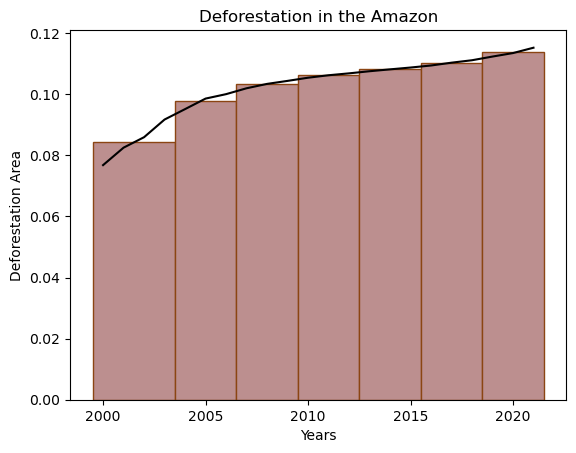

In [138]:
# Create Visual Encoding 1
fig, ax = plt.subplots()

ax.plot(areas_by_year["Year"], areas_by_year["Proportion_Area_Deforested"], color="black")
ax.bar(avg_areas_by_year_range["Midyear"], avg_areas_by_year_range["Average_Proportion_Area_Deforested"], color="rosybrown", edgecolor="saddlebrown", width=year_diffs)

ax.set_title("Deforestation in the Amazon")
ax.set_xlabel("Years")
ax.set_ylabel("Deforestation Area")

plt.show()

In [162]:
# Create the data for the pie chart (Visual Encoding 3)
prop_lsts = []
for prop in areas_by_year["Proportion_Area_Deforested"]:
    prop_lst = []
    prop_lst.append((prop * 100))
    prop_lst.append((100 - (prop * 100)))
    prop_lsts.append(prop_lst)

pie_chart_df = pd.DataFrame()
pie_chart_df["Placeholder"] = ["A", "B"]
pie_chart_df["Area_Status"] = ["% Deforested", "% Forested"]

for i in range(len(areas_by_year["Year"])):
    for j in range(len(prop_lsts)):
        if i == j:
            pie_chart_df["Deforested_Forested_Percentages_%s"%(areas_by_year["Year"][i])] = prop_lsts[j]

print(pie_chart_df)

  Placeholder   Area_Status  Deforested_Forested_Percentages_2000  \
0           A  % Deforested                              7.681667   
1           B    % Forested                             92.318333   

   Deforested_Forested_Percentages_2001  Deforested_Forested_Percentages_2002  \
0                              8.253705                               8.59586   
1                             91.746295                              91.40414   

   Deforested_Forested_Percentages_2003  Deforested_Forested_Percentages_2004  \
0                              9.174286                              9.515376   
1                             90.825714                             90.484624   

   Deforested_Forested_Percentages_2005  Deforested_Forested_Percentages_2006  \
0                              9.860047                             10.005194   
1                             90.139953                             89.994806   

   Deforested_Forested_Percentages_2007  ...  \
0           

In [163]:
# Turn the df into a .csv file to be used in D3
pie_chart_df.to_csv("all_pie_slices.csv", index=False)